##  Exercise Session 6: Decision Trees, Random Forests

**Total points (10 + 1 Bonus Point)**

Suppose you are a data scientist working for a bank. Your bank wants to identify which of its customers are likely to default on their loans. You have been given a dataset of customer information (under Exercises/Session_06 folder on OLAT), including their credit score, income, etc. Your task is to build a decision tree and random forest model that can predict which customers are likely to default on their loans.


The deadline to submit your solutions to this exercise is **the Tuesday in 2 weeks (09.04.2024) by the end of the day (23:59 CET)**. 

Please submit your solutions in python notebook format and rename the file as "**Exercise_06_FirstName_LastName.ipynb**"

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from matplotlib.pylab import rcParams

## Decision Trees and Random Forests 

In [2]:
#Load the dataset into a pandas DataFrame.
df = pd.read_csv('/Users/merterol/uzh/Computational Science/Sem 2/ESC403/Exercise 5/data/Loan_Default.csv')
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Task 1 (1 point): delete the categorical columns and columns named ID and year**

In [3]:
# detele the columns named ID and year
df = df.drop("ID", axis = 1)
df = df.drop("year", axis = 1)
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# delete the categorical values
df = df.select_dtypes(exclude=['object'])
df.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


**Task 2 (1 point): select Status column as output (y) and other columns as an input (X)**

In [5]:
out = df["Status"]
input = df.drop("Status", axis = 1)

**Task 3 (1 point): plot barplot of the status column**

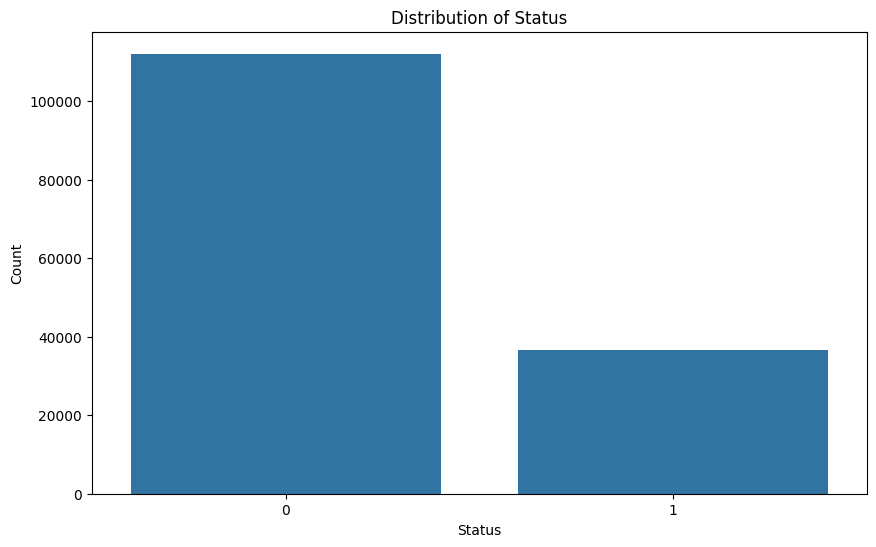

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x=out)
plt.title("Distribution of Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

**Task 4 (1 point): split the dataset to train and test sets, set the test set size to 20%**

In [7]:
train_x, test_x, train_y, test_y = train_test_split(input, out, test_size=0.2)

**Task 5 (1 point): check if there is nan values in X_train and  X_test**

In [8]:
train_x.isna().sum()

loan_amount                 0
rate_of_interest        29149
Interest_rate_spread    29303
Upfront_charges         31730
term                       34
property_value          12066
income                   7336
Credit_Score                0
LTV                     12066
dtir1                   19301
dtype: int64

In [9]:
test_x.isna().sum()

loan_amount                0
rate_of_interest        7290
Interest_rate_spread    7336
Upfront_charges         7912
term                       7
property_value          3032
income                  1814
Credit_Score               0
LTV                     3032
dtir1                   4820
dtype: int64

**Task 6 (1 point): replace NANs with 0s both in X_train, X_test**

In [10]:
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)


**Task 7 (1 point): train Decision Tree and test the decision tree on test set. Plot confusion matrix and print classification report**

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     89633\n           1       1.00      1.00      1.00     29303\n\n    accuracy                           1.00    118936\n   macro avg       1.00      1.00      1.00    118936\nweighted avg       1.00      1.00      1.00    118936\n'

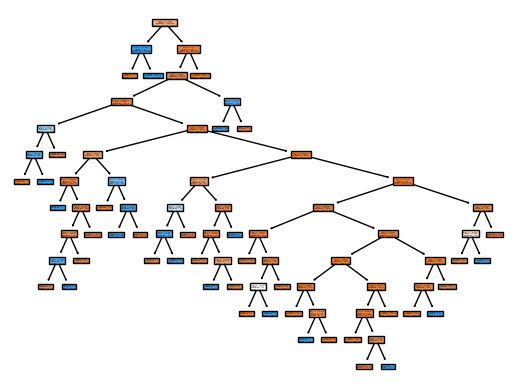

In [11]:
tree_trainer = DecisionTreeClassifier()
tree_trainer.fit(train_x, train_y)
plot_tree(tree_trainer, filled=True)
classification_report(tree_trainer.predict(train_x), train_y)


In [12]:
test_predictions = tree_trainer.predict(test_x)
classification_report(test_y, test_predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     22398\n           1       1.00      1.00      1.00      7336\n\n    accuracy                           1.00     29734\n   macro avg       1.00      1.00      1.00     29734\nweighted avg       1.00      1.00      1.00     29734\n'

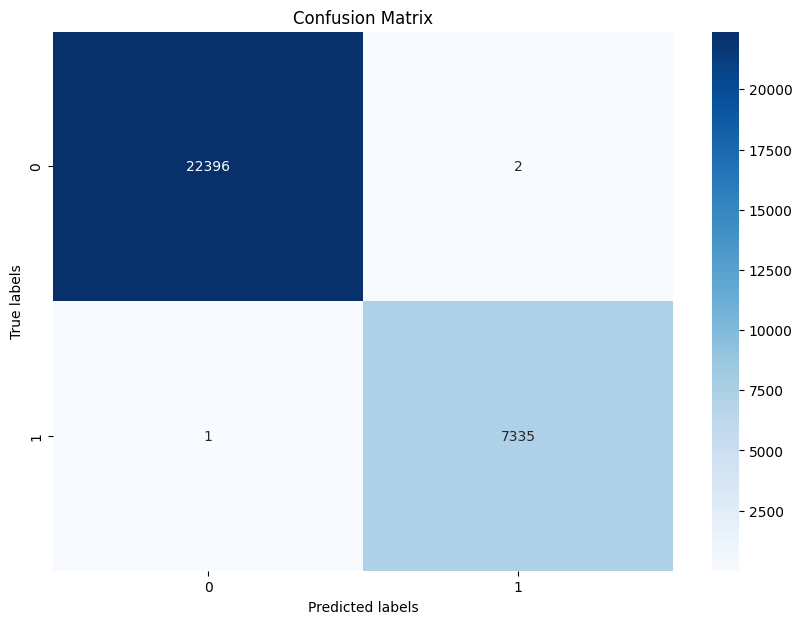

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = tree_trainer.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**Task 8 (1 point): plot the importance of each feature as a bar plot and plot the decision tree**

Text(0.5, 1.0, 'Feature Importance')

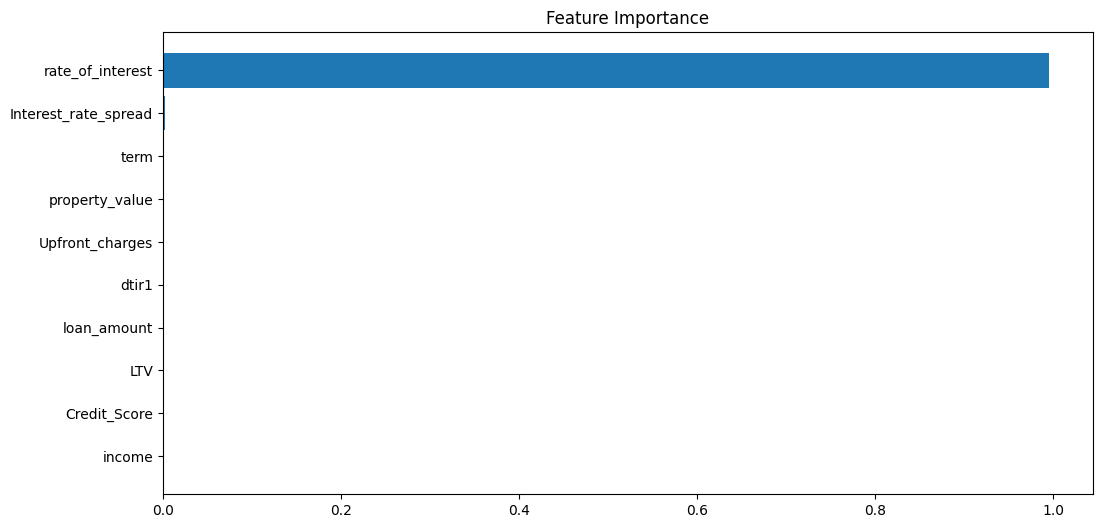

In [14]:
feature_importance = tree_trainer.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(test_x.columns)[sorted_idx])
plt.title("Feature Importance")


Text(0.5, 1.0, 'Feature Importance')

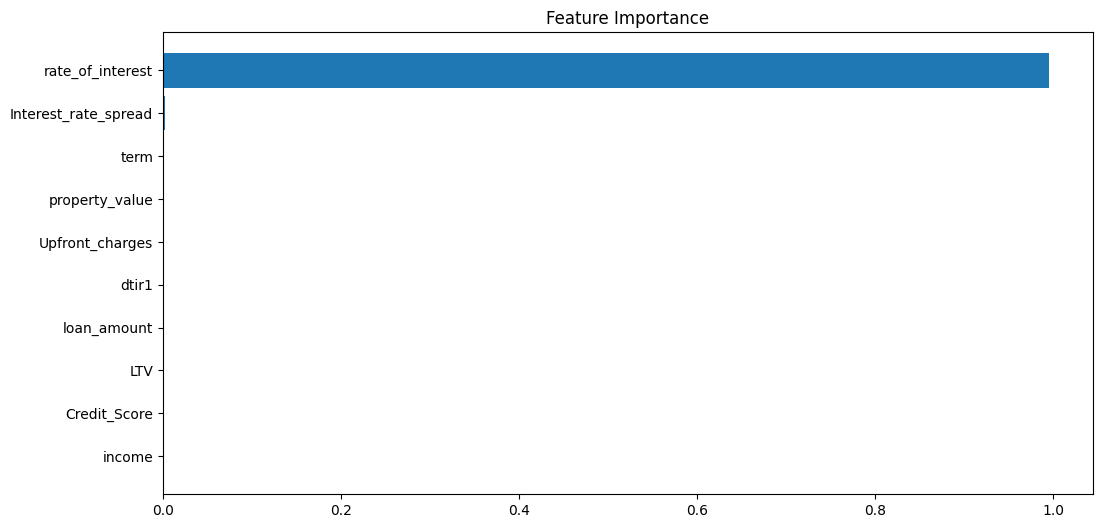

In [15]:
feature_importance = tree_trainer.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title("Feature Importance")


**Task 9 (1 point): train the same data with random forest and test on test set. Plot confusion matrix and print classification report**

In [17]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
classification_report(rf.predict(train_x), train_y)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     22398\n           1       1.00      1.00      1.00      7336\n\n    accuracy                           1.00     29734\n   macro avg       1.00      1.00      1.00     29734\nweighted avg       1.00      1.00      1.00     29734\n'

In [18]:
rf.fit(test_x, test_y)
classification_report(rf.predict(test_x), test_y)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     22398\n           1       1.00      1.00      1.00      7336\n\n    accuracy                           1.00     29734\n   macro avg       1.00      1.00      1.00     29734\nweighted avg       1.00      1.00      1.00     29734\n'

**Task 10 (1 point) : Plot the feature importance as a bar plot**

Text(0.5, 1.0, 'Feature Importance')

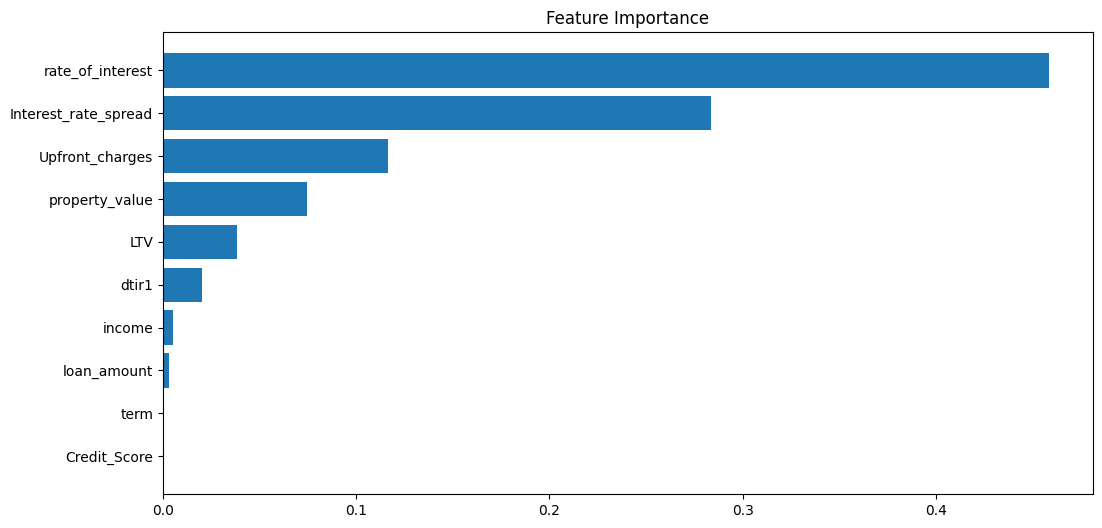

In [19]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title("Feature Importance")

Text(0.5, 1.0, 'Feature Importance')

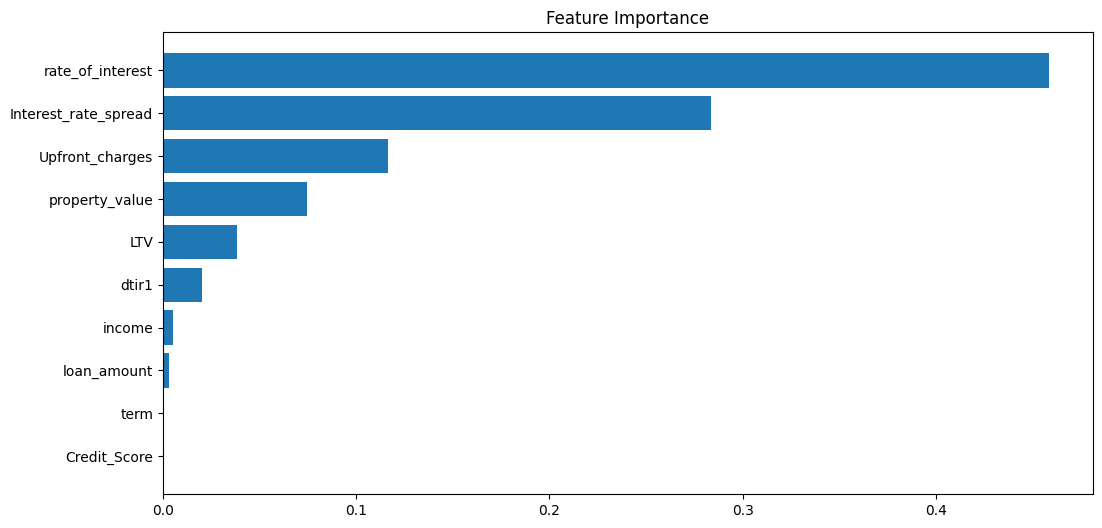

In [20]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(test_x.columns)[sorted_idx])
plt.title("Feature Importance")

**Task 11 (bonus point):Which model worked the best? Justify it.**